In [4]:
#Download the dataset and format it as a pandas DataFrame.
import pandas as pd
df = pd.read_csv('athlete_events.csv')

In [7]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [8]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [13]:
# I didin't. know that 'Notna'

# Filter the DataFrame to only include the rows corresponding to medal winners from 2016.
df_new = df[(pd.notna(df['Medal'])) & (df['Year'] == 2016)]
df_new.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
161,65,Patimat Abakarova,F,21.0,165.0,49.0,Azerbaijan,AZE,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze
175,73,Luc Abalo,M,31.0,182.0,86.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Silver
450,250,Saeid Morad Abdevali,M,26.0,170.0,80.0,Iran,IRI,2016 Summer,2016,Summer,Rio de Janeiro,Wrestling,"Wrestling Men's Middleweight, Greco-Roman",Bronze
794,455,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Team All-Around,Silver


In [48]:
# Find out the medals awarded in 2016 for each sport. List the top five sports based on the largest number of medals awarded.

top5 = df_new.groupby('Sport')['Medal'].count().sort_values(ascending=False).head(5)

In [56]:
# with isin 私は複数の値を条件としてデータ抽出ができます！

# Filter the DataFrame one more time to only include the records for the top five sports in 2016.


df_top5 = df[df['Sport'].isin(top5.index)]
df_top5.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN
27,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,NaN
29,10,"Einar Ferdinand ""Einari"" Aalto",M,26.0,NaN,NaN,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,NaN
35,15,Arvo Ossian Aaltonen,M,22.0,NaN,NaN,Finland,FIN,1912 Summer,1912,Summer,Stockholm,Swimming,Swimming Men's 200 metres Breaststroke,NaN


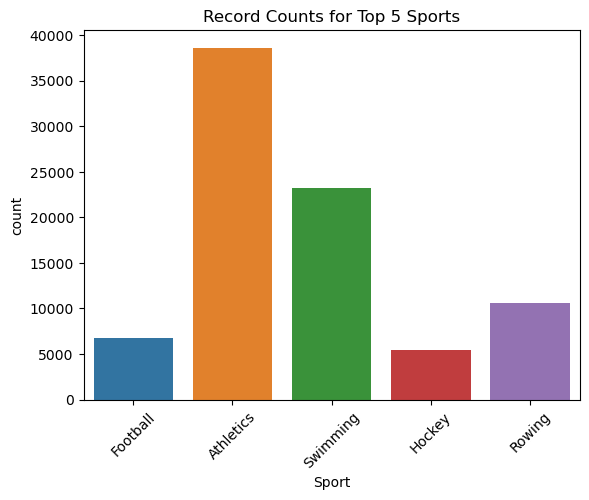

In [57]:
# シンプルなバーチャート

# Generate a bar plot of record counts corresponding to each of the top five sports.
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot
sns.countplot(x='Sport', data=df_top5)
plt.title('Record Counts for Top 5 Sports')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

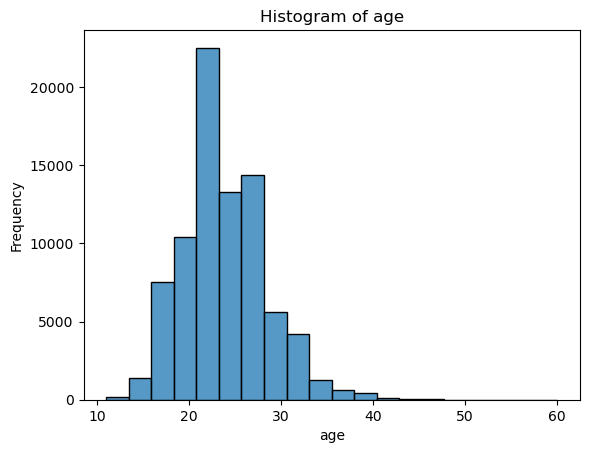

In [31]:
# Generate a histogram for the Age feature of all medal winners in the top five sports (2016).

sns.histplot(df_top5['Age'], kde=False,bins=20)
plt.title('Histogram of age')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.show()

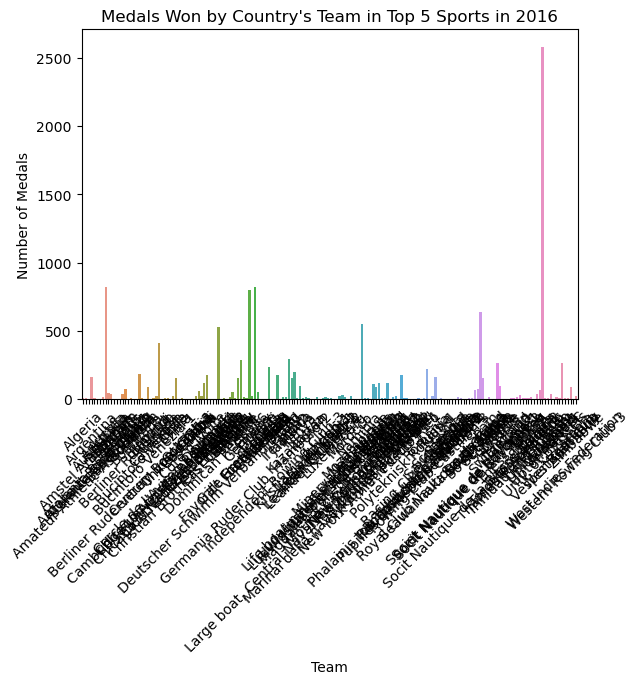

In [39]:
# Generate a bar plot indicating how many medals were won by each country's team in the top five sports in 2016.
grouped_df = df_top5.groupby('Team')['Medal'].count().reset_index()
grouped_df = grouped_df[grouped_df['Medal'] != 0]
grouped_df.head()

# # Creating the grouped bar plot using Seaborn
sns.barplot(x='Team', y='Medal', data=grouped_df)
plt.title('Medals Won by Country\'s Team in Top 5 Sports in 2016')
plt.xlabel('Team')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

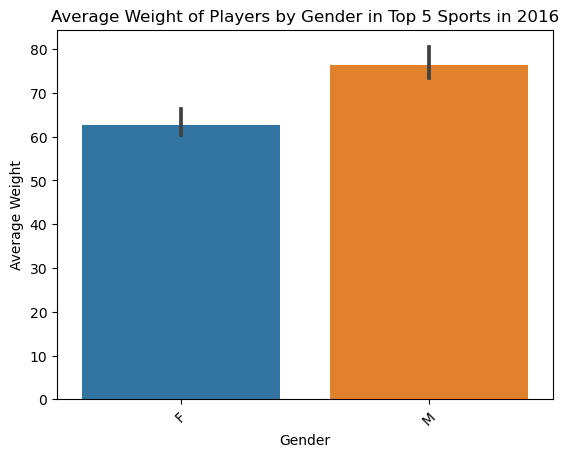

In [46]:
# Generate a bar plot indicating the average weight of players, categorized based on gender, winning in the top five sports in 2016

# Grouping the DataFrame by 'Sex' and calculating the mean weight for each gender
grouped_df = df_top5.groupby(['Sex','Sport'])['Weight'].mean().reset_index()

# Creating the bar plot
sns.barplot(x='Sex', y='Weight', data=grouped_df)
plt.title('Average Weight of Players by Gender in Top 5 Sports in 2016')
plt.xlabel('Gender')
plt.ylabel('Average Weight')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

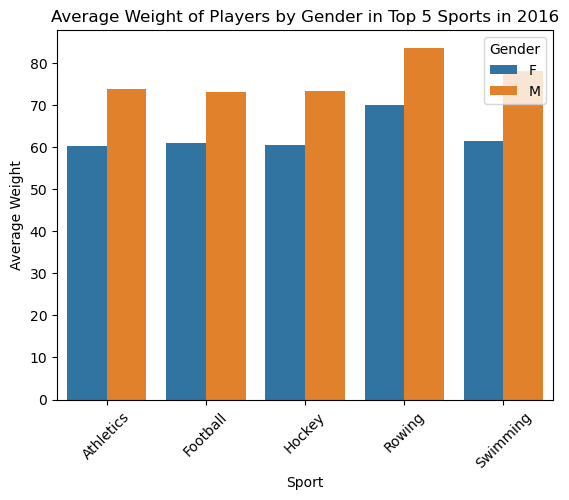

In [47]:
# Grouping the DataFrame by 'Sex' and 'Sport', and calculating the mean weight for each gender in each sport
grouped_df = df_top5.groupby(['Sex', 'Sport'])['Weight'].mean().reset_index()

# Creating the bar plot
sns.barplot(x='Sport', y='Weight', hue='Sex', data=grouped_df)
plt.title('Average Weight of Players by Gender in Top 5 Sports in 2016')
plt.xlabel('Sport')
plt.ylabel('Average Weight')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(title='Gender')
plt.show()


# About 'hue'

In data visualization, "hue" refers to a parameter that allows you to introduce a third dimension of information into your plot. It's often used in plots like scatter plots, bar plots, and line plots to represent categories or groups within the data.

In the context of Seaborn's barplot() function, the hue parameter allows you to color the bars differently based on the values in another categorical variable. When you specify hue, Seaborn will automatically create bars for each unique value in the specified variable and color them differently, making it easier to distinguish between different categories within the same plot.

For example, if you're creating a bar plot showing the average weight of players by gender and sport, you can use the hue parameter to represent gender. Each bar for a particular sport will then have two sections, one for males and one for females, with each section colored differently to indicate the gender.
